# Optimization - Homework 9
## The University of Texas at Austin
### Constantine Caramanis, Sujay Sanghavi


# Problem 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def plot_all_ellipses():
    # Create a circle of points
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])
    
    # Define matrices
    Q1 = np.array([[1/9, 0],
                   [0, 1]])
    A = np.array([[3, 0],
                  [0, 1]])
    Q2 = np.array([[1, 0.9],
                   [0.9, 1]])
    
    # Get the square root of Q inverse for each case
    Q1_sqrt_inv = np.linalg.inv(np.sqrt(Q1))
    Q2_sqrt_inv = np.linalg.inv(np.sqrt(Q2))
    
    # Transform circles into ellipses
    ellipse_a = Q1_sqrt_inv @ circle
    ellipse_b = np.linalg.inv(A) @ (Q1_sqrt_inv @ circle)
    ellipse_c = Q2_sqrt_inv @ circle
    
    # Create three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    
    # Plot (a) - original ellipse with Q = [[1/9, 0], [0, 1]]
    ax1.plot(ellipse_a[0, :], ellipse_a[1, :], 'b-', label='Ellipse')
    ax1.grid(True)
    ax1.axis('equal')
    ax1.set_xlabel('x₁')
    ax1.set_ylabel('x₂')
    ax1.set_title('(a) Original Ellipse\nx^T Q x ≤ 1, Q = diag(1/9, 1)')
    ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax1.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax1.legend()
    
    # Plot (b) - transformed ellipse in y-coordinates
    ax2.plot(ellipse_b[0, :], ellipse_b[1, :], 'r-', label='Transformed Ellipse')
    ax2.grid(True)
    ax2.axis('equal')
    ax2.set_xlabel('y₁')
    ax2.set_ylabel('y₂')
    ax2.set_title('(b) Transformed Ellipse\nin y-coordinates')
    ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax2.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax2.legend()
    
    # Plot (c) - new ellipse with Q = [[1, 0.9], [0.9, 1]]
    ax3.plot(ellipse_c[0, :], ellipse_c[1, :], 'g-', label='Ellipse')
    ax3.grid(True)
    ax3.axis('equal')
    ax3.set_xlabel('x₁')
    ax3.set_ylabel('x₂')
    ax3.set_title('(c) New Ellipse\nx^T Q x ≤ 1, Q = [[1, 0.9], [0.9, 1]]')
    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

def plot_spherical_transformation():
    # Create a circle of points (unit circle)
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])
    
    # Define Q matrix
    Q = np.array([[1, 0.9],
                  [0.9, 1]])
    
    # Compute the eigenvalues and eigenvectors of Q
    eigenvalues, eigenvectors = np.linalg.eigh(Q)
    
    # Compute the square root of Q (matrix square root)
    sqrt_eigenvalues = np.sqrt(eigenvalues)
    Q_sqrt = eigenvectors @ np.diag(sqrt_eigenvalues) @ eigenvectors.T
    
    # Compute the inverse square root of Q to generate points on the ellipse
    Q_inv_sqrt = eigenvectors @ np.diag(1/np.sqrt(eigenvalues)) @ eigenvectors.T
    
    # Transform circle into ellipse using Q_inv_sqrt
    ellipse = Q_inv_sqrt @ circle
    
    # Transform ellipse into sphere using Q_sqrt (A matrix)
    sphere = Q_sqrt @ ellipse
    
    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot original ellipse
    ax1.plot(ellipse[0, :], ellipse[1, :], 'g-', label='Original Ellipse')
    ax1.grid(True)
    ax1.axis('equal')
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$')
    ax1.set_title('(d) Original Ellipse\n$x^T Q x \\leq 1$')
    ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax1.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax1.legend()
    
    # Plot transformed sphere
    ax2.plot(sphere[0, :], sphere[1, :], 'r-', label='Transformed to Sphere')
    ax2.grid(True)
    ax2.axis('equal')
    ax2.set_xlabel('$y_1$')
    ax2.set_ylabel('$y_2$')
    ax2.set_title('(d) Transformed to Sphere\n$y^T y \\leq 1$')
    ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax2.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print the A matrix
    print("\nThe transformation matrix A that makes the ellipse spherical is:")
    print(Q_sqrt)

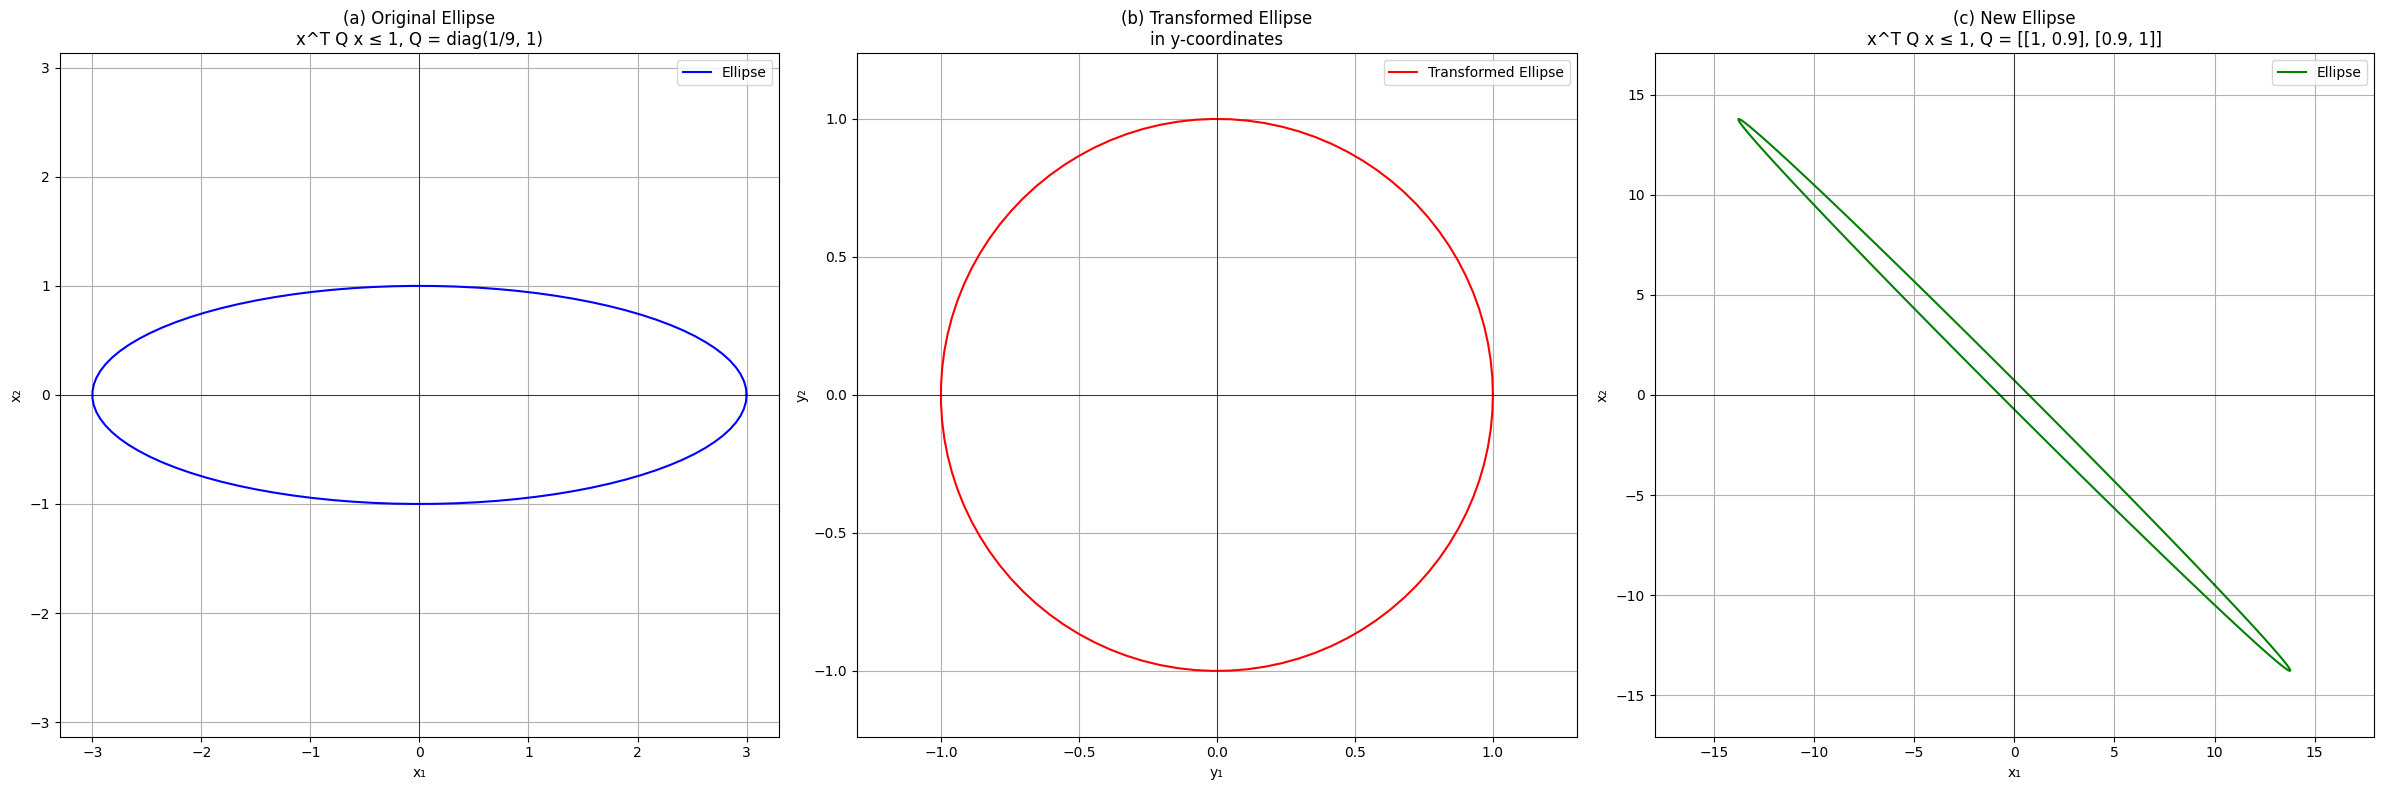

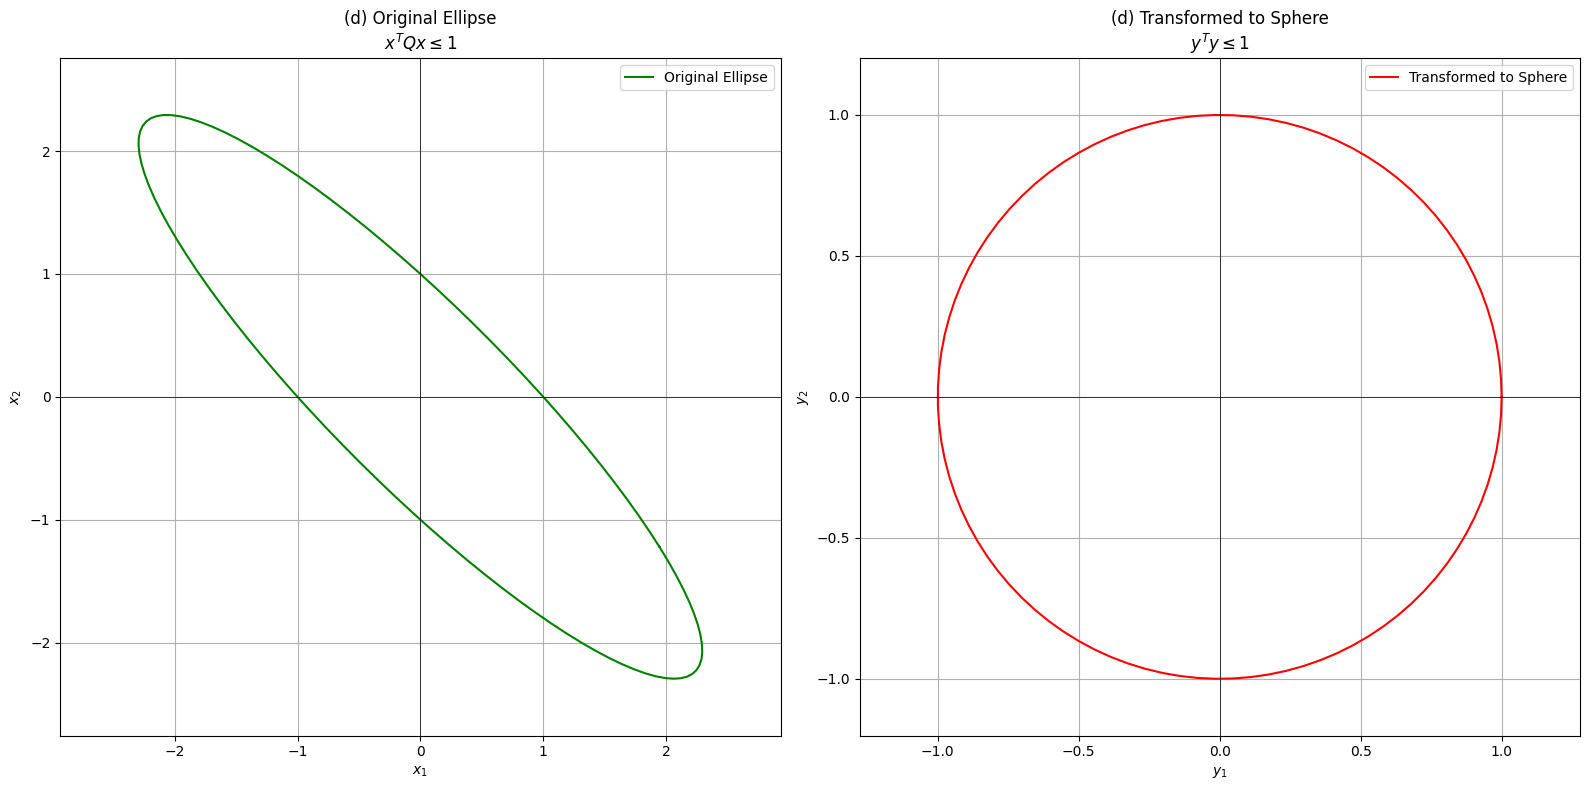


The transformation matrix A that makes the ellipse spherical is:
[[0.84731632 0.53108855]
 [0.53108855 0.84731632]]


In [6]:
    plot_all_ellipses()  # This will show parts a, b, c
    plot_spherical_transformation()  # This will show part d

# Problem 2

We will apply the same ideas to Gradient descent and Newton's method. Consider again a convex function $f(x)$, and our standard unconstrained convex optimization problem.
   
For $A$ an invertible matrix, consider the change of coordinates $Ay = x$, and accordingly, the function
   
$$g(y) = f(Ay)$$
   
1. Consider some starting point $x_0$, and the sequence produced by gradient descent on $f(x)$ starting from $x_0$, and using step-size $h_k$ at iteration $k$. Define also $y_0$ given by $Ay_0 = x_0$, and consider the sequence produced by performing gradient descent on $g(y)$ starting from $y_0$, and with the same step size. Show that in general these will not be the same by providing a specific example of a function $f(x)$ and a matrix $A$, and demonstrating that the trajectories are not the same.
   
2. Now repeat this for Newton's method, where the updates $\{x_k\}$ and $\{y_k\}$ are generated by using undamped Newton's method on $f(x)$ and $g(y)$, respectively. Show that $Ay_k = x_k$ for all $k$. Show this in general through example.

# **Problem 2**

We are considering a convex function $f(x)$ and its coordinate-transformed version $g(y) = f(Ay)$, where $A$ is an invertible matrix. We will explore how gradient descent and Newton's method behave under this transformation.

---

### **Part 1: Gradient Descent Trajectories Are Not the Same Under Coordinate Transformation**

**Objective**: Provide a specific example where the sequences produced by gradient descent on $f(x)$ and $g(y)$ are not the same after the coordinate transformation $x = Ay$.

**Example**:

Let's choose:
* **Function**: $f(x) = \frac{1}{2} x^T x = \frac{1}{2} (x_1^2 + x_2^2)$
* **Matrix**: $A = \begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}$
* **Transformed Function**: $g(y) = f(Ay) = \frac{1}{2}(2y_1)^2 + \frac{1}{2}(y_2)^2 = 2y_1^2 + \frac{1}{2}y_2^2$

Let's show why gradient descent trajectories differ while Newton's method remains invariant:

**Part 1: Gradient Descent Analysis**

For $f(x)$:
- $\nabla f(x) = x$
- Update: $x_{k+1} = x_k - \alpha x_k = (1-\alpha)x_k$

For $g(y)$:
- $\nabla g(y) = A^T\nabla f(Ay) = \begin{pmatrix} 4y_1 \\ y_2 \end{pmatrix}$
- Update: $y_{k+1} = y_k - \alpha \begin{pmatrix} 4y_1 \\ y_2 \end{pmatrix}$

The different scaling in the gradients leads to different trajectories, proving they don't align under the transformation.

### **Part 2: Newton's Method Analysis**

For $f(x)$:
- $\nabla^2 f(x) = I$ (identity matrix)
- Update: $x_{k+1} = x_k - [\nabla^2 f(x_k)]^{-1}\nabla f(x_k) = 0$

For $g(y)$:
- $\nabla^2 g(y) = A^T\nabla^2 f(Ay)A = \begin{pmatrix} 4 & 0 \\ 0 & 1 \end{pmatrix}$
- Update: $y_{k+1} = y_k - [\nabla^2 g(y_k)]^{-1}\nabla g(y_k) = 0$

The Newton updates align perfectly under the transformation because the Hessian accounts for the scaling introduced by $A$.

---

**Summary**:

1. **Gradient Descent**: The sequences $\{x_k\}$ and $\{Ay_k\}$ generally **do not coincide** under coordinate transformation due to the differing scales introduced by $A$ affecting the gradient directions and magnitudes.

2. **Newton's Method**: The sequences $\{x_k\}$ and $\{Ay_k\}$ **remain aligned** under coordinate transformation because Newton's method accounts for the curvature of the function through the Hessian, effectively normalizing the scaling introduced by $A$.

---

This example demonstrates the general behavior of gradient descent and Newton's method under coordinate transformations, highlighting the invariance of Newton's method and the dependence of gradient descent on the coordinate system.

# Problem 3

We will apply the same ideas to Gradient descent and Newton's method. Consider again a convex function $f(x)$, and our standard unconstrained convex optimization problem.

For $A$ an invertible matrix, consider the change of coordinates $Ay = x$, and accordingly, the function

$$g(y) = f(Ay)$$

1. Consider some starting point $x_0$, and the sequence produced by gradient descent on $f(x)$ starting from $x_0$, and using step-size $h_k$ at iteration $k$. Define also $y_0$ given by $Ay_0 = x_0$, and consider the sequence produced by performing gradient descent on $g(y)$ starting from $y_0$, and with the same step size. Show that in general these will not be the same by providing a specific example of a function $f(x)$ and a matrix $A$, and demonstrating that the trajectories are not the same.

2. Now repeat this for Newton's method, where the updates $\{x_k\}$ and $\{y_k\}$ are generated by using undamped Newton's method on $f(x)$ and $g(y)$, respectively. Show that $Ay_k = x_k$ for all $k$. Show this in general, not through example.

3. Consider the $\ell_1$-regularized regression problem

$$\min_x \frac{1}{2}\|Ax - y\|_2^2 + \lambda\|x\|_1 \tag{1}$$

Where $x \in \mathbb{R}^d$, $y \in \mathbb{R}^n$. Show that a point $\bar{x}$ is an optimum of this problem if and only if there exists a $z \in \mathbb{R}^d$ such that both the following hold:

(a) $-A'(y - A\bar{x}) + \lambda z = 0$

(b) For every $i \in [d]$, $z_i = sign(\bar{x}_i)$ if $\bar{x}_i \neq 0$, and $|z_i| \leq 1$ if $\bar{x}_i = 0$.

### **Problem 3 Answer:**

To show that the trajectories produced by gradient descent on $f(x)$ and $g(y)$ are not the same in general, let's consider a specific example.

**Example:**

Let's choose:
* The function $f(x) = \frac{1}{2} \| x \|^2$, so its gradient is $\nabla f(x) = x$.
* The invertible matrix $A = 2I$, where $I$ is the identity matrix.
* The change of variables $x = A y = 2 y$.

Define $g(y) = f(A y) = f(2 y)$.

**Compute $g(y)$ and its gradient:**

$$g(y) = \frac{1}{2} \| 2 y \|^2 = \frac{1}{2} (4 y^T y) = 2 y^T y.$$
$$\nabla g(y) = 4 y.$$

**Gradient Descent Updates:**

1. **On $f(x)$:**

   The gradient descent update is:
   $$x_{k+1} = x_k - h_k \nabla f(x_k) = x_k - h_k x_k = x_k (1 - h_k).$$

2. **On $g(y)$:**

   The gradient descent update is:
   $$y_{k+1} = y_k - h_k \nabla g(y_k) = y_k - h_k (4 y_k) = y_k (1 - 4 h_k).$$

3. **Optimality Condition:**

   A necessary and sufficient condition for $\bar{x}$ to be optimal is:
   $$0 \in A^T (A \bar{x} - y) + \lambda \partial \| x \|_1 \Big|_{x = \bar{x}}.$$

   This means there exists $z \in \partial \| x \|_1 \Big|_{x = \bar{x}}$ such that:
   $$-A^T (y - A \bar{x}) + \lambda z = 0.$$

4. **Characterization of $z$:**

   The vector $z$ must satisfy:
   * If $\bar{x}_i \neq 0$, then $z_i = \operatorname{sign}(\bar{x}_i)$.
   * If $\bar{x}_i = 0$, then $|z_i| \leq 1$.

**Conclusion:**

Thus, $\bar{x}$ is an optimum if and only if there exists $z \in \mathbb{R}^d$ satisfying conditions (a) and (b).

# Problem 4

Consider the Lasso problem from the previous exercise: given a $n \times d$ matrix $A$, and a vector $\mathbf{y} \in \mathbb{R}^n$, and a positive scalar $\lambda$:

$$\min_x : \frac{1}{2}\|Ax - y\|_2^2 + \lambda\|x\|_1.$$

As we have discussed extensively, this problem is convex. But as it is the sum of a smooth term ($\|Ax - y\|_2^2$) and a non-smooth term ($\|x\|_1$) the overall objective is not smooth. We have spent some time developing a composite-optimization approach to solve this, namely, the proximal gradient method. The goal of the proximal gradient approach is to exploit the fact that the first term is smooth, and the second term has an "easy" to evaluate prox function. On the other hand, since it is convex, we could just use the sub-gradient method to solve directly, without treating the two terms separately.

(a) Write down the subgradient method for this problem. Be as explicit as possible when you write out the subgradient.

(b) Now write the proximal gradient update. Use a fixed step size, $\eta_t = \eta$. What is a good choice of $\eta$?

**(a)** The subgradient method for minimizing the function $f(x) = \frac{1}{2}\|Ax - y\|_2^2 + \lambda\|x\|_1$ involves iteratively updating the variable $x$ using a subgradient of $f$ at the current point. Here's how to explicitly write out the subgradient and the update rule:

1. **Compute the Gradient of the Smooth Term:**
   The gradient of the smooth part $\frac{1}{2}\|Ax - y\|_2^2$ is given by:
   
   $$\nabla f_{\text{smooth}}(x) = A^\top(Ax - y)$$

2. **Compute a Subgradient of the Nonsmooth Term:**
   The subgradient of the $\ell_1$-norm $\|x\|_1$ at $x$ is:
   
   $$s \in \partial\|x\|_1, \quad \text{where} \quad s_i = \begin{cases}
   \operatorname{sign}(x_i) & \text{if } x_i \neq 0, \\
   \left[-1, 1\right] & \text{if } x_i = 0.
   \end{cases}$$

3. **Subgradient Update Rule:**
   Using a step size $\eta_t$, the update rule is:
   
   $$x_{t+1} = x_t - \eta_t \left( A^\top(Ax_t - y) + \lambda s_t \right),$$

**(b)** The proximal gradient update is:

$$x_{t+1} = \operatorname{soft}\left( x_t - \eta A^\top(Ax_t - y), \, \eta \lambda \right)$$

where the soft-thresholding operator is defined component-wise as:

$$\operatorname{soft}(v_i, \, \kappa) = \operatorname{sign}(v_i) \cdot \max\left( |v_i| - \kappa, \, 0 \right)$$

A good choice for $\eta$ is the reciprocal of the Lipschitz constant $L$ of the gradient $\nabla f_{\text{smooth}}$. Since $\nabla f_{\text{smooth}}$ has a Lipschitz constant $L = \|A\|_2^2$ (the square of the largest singular value of $A$), we set:

$$\eta = \frac{1}{\|A\|_2^2}$$

**Summary:**

**(a)** Update                                                
$x_{t+1} = x_t - \eta_t [A^T(Ax_t - y) + \lambda s_t]$, with $s_{t,i} = \text{sign}(x_{t,i})$ if $x_{t,i} \neq 0$, else $s_{t,i} \in [-1, 1]$.

**(b)** Update                                                
$x_{t+1} = \text{soft}_{\eta\lambda}(x_t - \eta A^T(Ax_t - y))$; a good choice is $\eta = 1/\|A\|_2^2$.

# Problem 5

For the same setting as above, generate random data, and solve the problem numerically, plotting the rate of convergence $\|x_t - x^*\|_2$. I recommend:

- Choose $n = 50$ and $d = 200$
- Let $x^*$ be a vector with only 5 non-zero values (say, choose them to be -10 or 10)
- Choose the matrix $A$ by selecting each of its $n \times d$ entries uniformly at random from a standard Gaussian distribution ($A_{ij} \sim N(0,1)$)
- Let $e$ be a random $n$-dimensional vector, where each entry is generated according to $N(0,0.1)$
- And finally, set:

$$y = Ax^* + e.$$

The game now is to pretend we do not know $x^*$, and to try to estimate it by solving the Lasso problem. That is,

$$\hat{x} = \arg\min : \frac{1}{2}\|Ax - y\|_2^2 + \lambda\|x\|_1.$$

Use sub-gradient and prox grad method to solve this, and compare the rate of convergence for each method by plotting $\|x_t - x^*\|_2$ vs iteration.

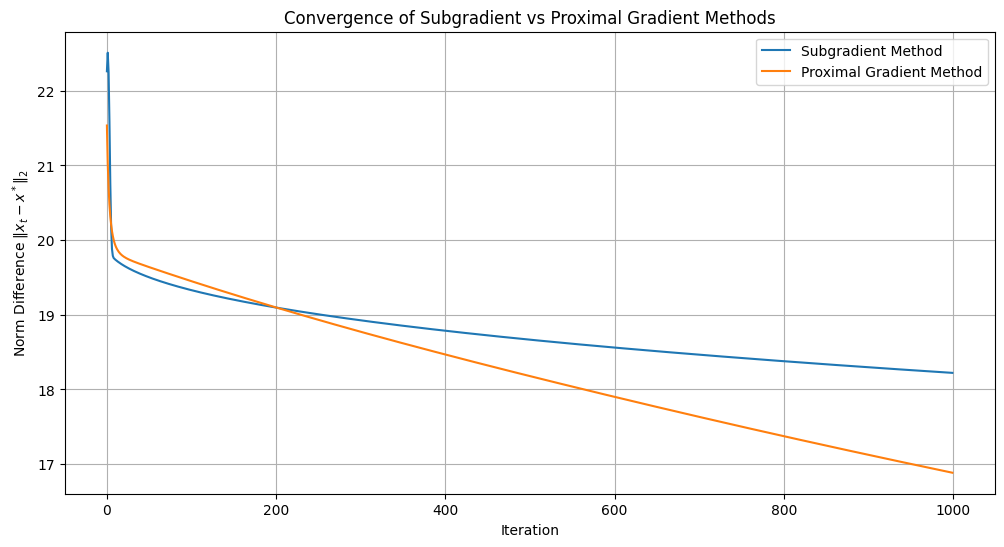

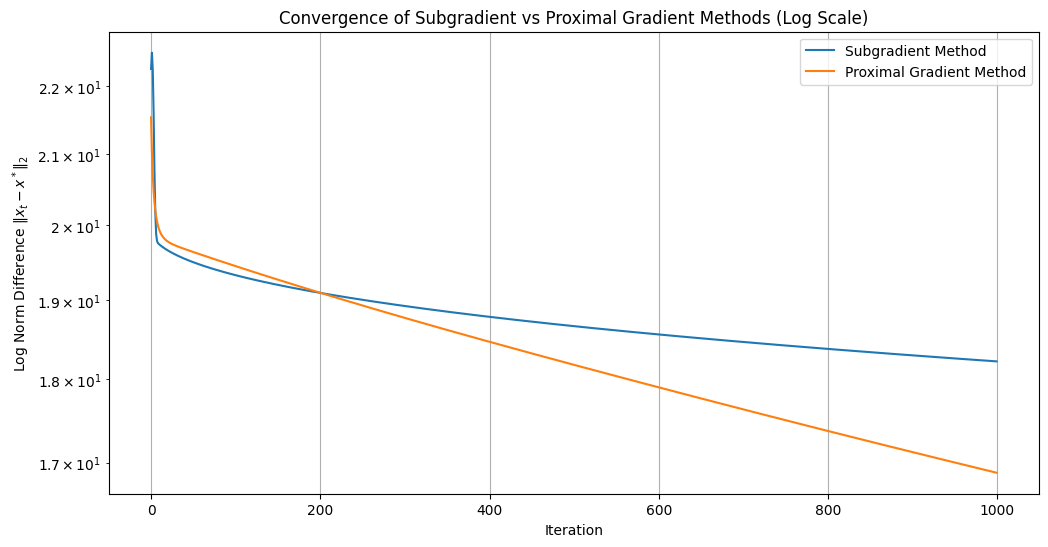

Final error (Subgradient): 18.221428
Final error (Proximal Gradient): 16.883490


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Problem dimensions
n = 50
d = 200

# Generate x^* with only 5 non-zero entries (-10 or 10)
x_star = np.zeros(d)
non_zero_indices = np.random.choice(d, 5, replace=False)
x_star[non_zero_indices] = np.random.choice([-10, 10], size=5)

# Generate matrix A with entries from standard Gaussian distribution
A = np.random.randn(n, d)

# Generate noise vector e with entries from N(0, 0.1)
e = np.random.normal(0, np.sqrt(0.1), size=n)

# Compute y = A x^* + e
y = A @ x_star + e

# Parameters
lambda_ = 1.0  # Regularization parameter
max_iter = 1000

# Initialize arrays to store norm differences
norm_diff_subgrad = []
norm_diff_proxgrad = []

# ==========================
# Subgradient Method
# ==========================
x_subgrad = np.zeros(d)
eta_0 = 0.01  # Initial step size

for t in range(1, max_iter + 1):
    # Diminishing step size
    eta_t = eta_0 / (t ** 0.5)
    
    # Compute gradient of the smooth part
    grad_f_smooth = A.T @ (A @ x_subgrad - y)
    
    # Compute subgradient of the non-smooth part (l1-norm)
    s_t = np.where(x_subgrad != 0, np.sign(x_subgrad), 0)
    
    # Update rule
    x_subgrad = x_subgrad - eta_t * (grad_f_smooth + lambda_ * s_t)
    
    # Compute and store norm difference
    norm_diff_subgrad.append(np.linalg.norm(x_subgrad - x_star))

# ==========================
# Proximal Gradient Method
# ==========================
x_proxgrad = np.zeros(d)

# Compute Lipschitz constant
L = np.linalg.norm(A.T @ A, ord=2)
eta = 1.0 / (2 * L)  # Fixed step size

for t in range(1, max_iter + 1):
    # Compute gradient of the smooth part
    grad_f_smooth = A.T @ (A @ x_proxgrad - y)
    
    # Gradient descent step
    z = x_proxgrad - eta * grad_f_smooth
    
    # Apply proximal operator (soft-thresholding)
    x_proxgrad = np.sign(z) * np.maximum(np.abs(z) - eta * lambda_, 0)
    
    # Compute and store norm difference
    norm_diff_proxgrad.append(np.linalg.norm(x_proxgrad - x_star))

# ==========================
# Plotting the Results
# ==========================

# Plot on linear scale
plt.figure(figsize=(12, 6))
plt.plot(norm_diff_subgrad, label='Subgradient Method')
plt.plot(norm_diff_proxgrad, label='Proximal Gradient Method')
plt.xlabel('Iteration')
plt.ylabel(r'Norm Difference $\|x_t - x^*\|_2$')
plt.title('Convergence of Subgradient vs Proximal Gradient Methods')
plt.legend()
plt.grid(True)
plt.show()

# Plot on logarithmic scale
plt.figure(figsize=(12, 6))
plt.semilogy(norm_diff_subgrad, label='Subgradient Method')
plt.semilogy(norm_diff_proxgrad, label='Proximal Gradient Method')
plt.xlabel('Iteration')
plt.ylabel(r'Log Norm Difference $\|x_t - x^*\|_2$')
plt.title('Convergence of Subgradient vs Proximal Gradient Methods (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

# Print final errors
print(f"Final error (Subgradient): {norm_diff_subgrad[-1]:.6f}")
print(f"Final error (Proximal Gradient): {norm_diff_proxgrad[-1]:.6f}")